In [2]:
!pip install opencv-python-headless

In [ ]:
# Download links for SAM model checkpoints from Meta AI's official GitHub repository:
# vit_b (01ec64.pth): https://github.com/facebookresearch/segment-anything#model-checkpoints
# Direct download:
# 01ec64.pth (vit_b): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
# 8939.pth (vit_h): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

print("SAM model checkpoint download links:")
print("vit_b (01ec64.pth): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth")
print("vit_h (8939.pth): https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth")
print("Official GitHub: https://github.com/facebookresearch/segment-anything#model-checkpoints")

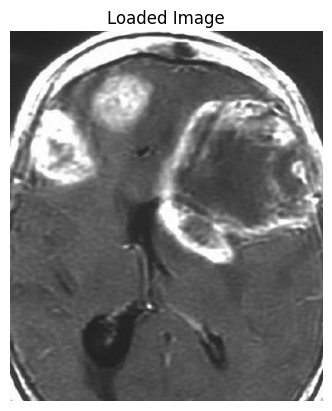

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

img_path = r"C:\Users\shrir\Music\New folder\archive\Testing\glioma_tumor\image(5).jpg"
if not os.path.exists(img_path):
    print(f"Error: File does not exist at {img_path}")
else:
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error: Could not load image at {img_path}")
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title("Loaded Image")
        plt.axis('off')
        plt.show()

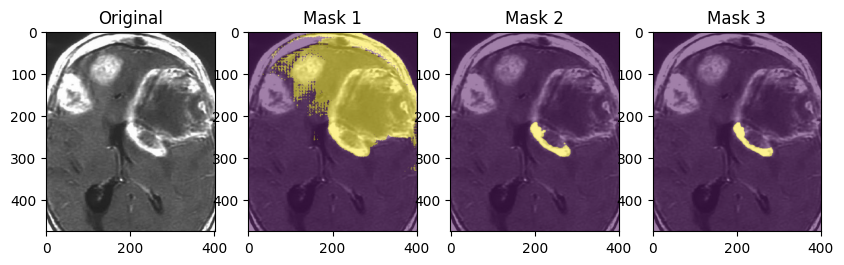

In [10]:
if image is not None:
    # Load SAM model (make sure to download the weights and set the correct path)
    from segment_anything import sam_model_registry, SamPredictor
    import numpy as np

    sam = sam_model_registry["vit_b"](checkpoint=r"C:\Users\shrir\Music\New folder\sam_vit_b_01ec64.pth")
    predictor = SamPredictor(sam)
    predictor.set_image(image_rgb)

    # Select a point for segmentation (e.g., center of image)
    input_point = np.array([[image.shape[1]//2, image.shape[0]//2]])
    input_label = np.array([1])

    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # Visualize
    plt.figure(figsize=(10,5))
    plt.subplot(1, len(masks)+1, 1)
    plt.imshow(image_rgb)
    plt.title("Original")
    for i, mask in enumerate(masks):
        plt.subplot(1, len(masks)+1, i+2)
        plt.imshow(image_rgb)
        plt.imshow(mask, alpha=0.5)
        plt.title(f"Mask {i+1}")
    plt.show()